# Help International NGO - Clustering Assignment
#### By Malathi Ashok

Approach
Based on the business problem and looking at the dataset at a high level, I will be following the below approach to solve this problem.

    1) Check for missing value, and treatment
    2) Check for outlier and treatment
    3) Perform the basic EDA to find the variablity and distribution of the data, so as to identify if
        we need to scale the data - Data Scaling if necessary
    4) Use Hopkins Method to check if the dataset is good enough for a cluster analysis
    5) Using Hierarchical clustering to identify the optimal cluster value.
    6) Use Silhouette and Elbow method to validate the optimal cluster values.
    7) Use K-Means Cluster method to build the final cluster model.
    8) Analyse the cluster that is representing the countries that will solve the Business Problem.
    9) Present the final report
    
    
# READ the data

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from pylab import rcParams

In [2]:
# Reading the dataset 
df=pd.read_csv("Country-data.csv",encoding='utf-8',engine='python')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data Quality Check

In [3]:
# Shape of the dataframe (Rows & Columns)
df.shape

(167, 10)

In [4]:
# basic information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### As we can see all columns are numerical except the country column

In [5]:
# Descriptive Statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Checking missing values in the Dataset

In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### As we can see there are no null values in the Dataset

Insight - Dataframe has data about various countries and their socio-economic factors. Few (Imports, Health, Exports) are in % and others in absolute values. - Dataframe has 10 Columns and 167 Rows - One variable is 'Object' Type, and rest all are 'Int' or 'Float' type - Descriptive Statistics tells us that there is variablity in the data, and will require scaling before model building.

# Data Transformation

In our dataframe (df), the 'imports', 'exports' and 'health' variable seems to be in percentage of GDP per capita, and this can sometimes give a incorrect insight in our EDA. for example, the health spending of 'United states' is 17.9 and that of 'Sierra Leone' is '13.1', both of which are very close to each other in health spending in terms of their % of GDP per capita. But these figures do not actually tell us the real story of how rich and poor are 'USA' and 'Sierra Leone' is. So the best way to tackle it is to convert the % values to ABSOLUTE values

In [7]:
df[df['country']== 'United States']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


In [8]:
df[df['country']== 'Sierra Leone']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.2,55.0,5.2,399


In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Converting the %values to absolute values

In [10]:
df['imports'] = df['imports'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
# Checking the new shape of the dataframe
df.shape

(167, 10)

In [12]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Outlier Treatment

#### Checking the Outlier Values

In [13]:
num_columns = df.drop('country',axis=1)

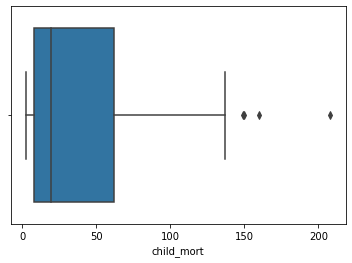

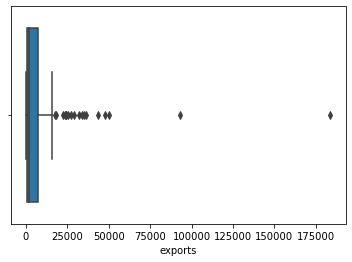

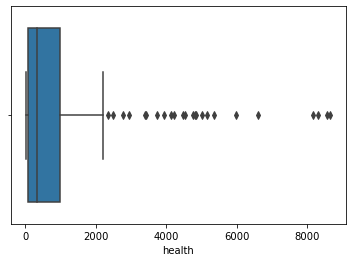

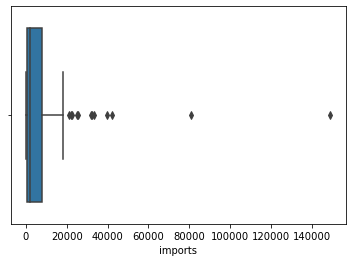

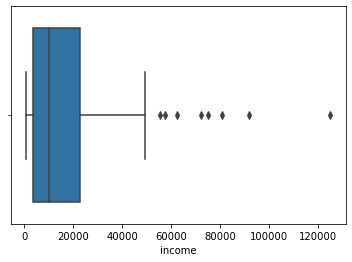

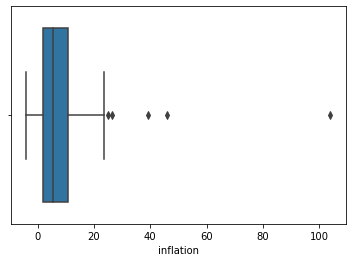

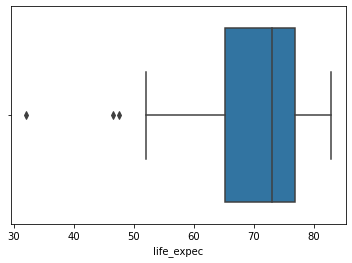

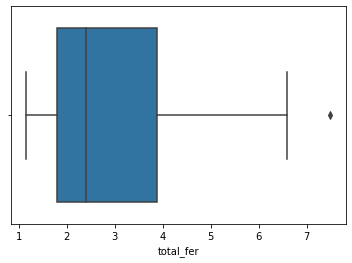

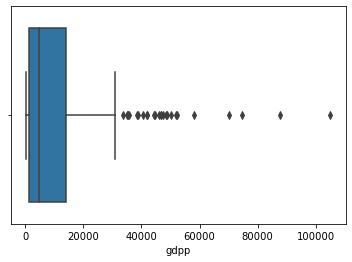

In [14]:
for c in num_columns:
    sns.boxplot(df[c])
    plt.show();

#### For columns such as CHILD_MORT, INFLATION, TOTAL_FERTI, we do not do anything to the upper range outliers, but we can cap the lower range outliers (capping). Since we do not have any lower range outliers for these three, we dont do any capping. We just leave it as it is

####  For exports, health, imports, income, life_expec, gdpp, we do not do anything with the lower range outliers but we cap the upper range outliers with 99% value

In [15]:
q2 = df['exports'].quantile(.99)
print(q2)

64794.26000000014


In [16]:
df['exports'][df['exports']>=q2] = q2

In [17]:
q2 = df['health'].quantile(.99)
print(q2)

8410.3304


In [18]:
df['health'][df['health']>=q2] = q2

In [19]:
q2 = df['imports'].quantile(.99)
print(q2)

55371.39000000013


In [20]:
df['imports'][df['imports']>=q2] = q2

In [21]:
q2 = df['income'].quantile(.99)
print(q2)

84374.00000000003


In [22]:
df['income'][df['income']>=q2] = q2

In [23]:
q2 = df['life_expec'].quantile(.99)
print(q2)

82.37


In [24]:
df['life_expec'][df['life_expec']>=q2] = q2

In [25]:
q2 = df['gdpp'].quantile(.99)
print(q2)

79088.00000000004


In [26]:
df['gdpp'][df['gdpp']>=q2] = q2

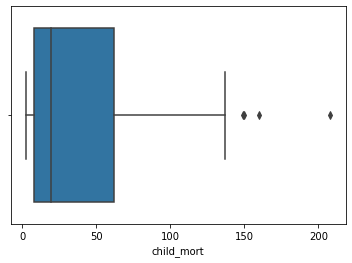

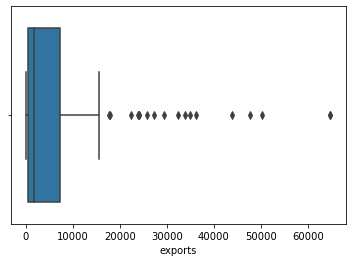

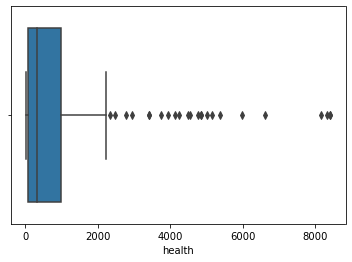

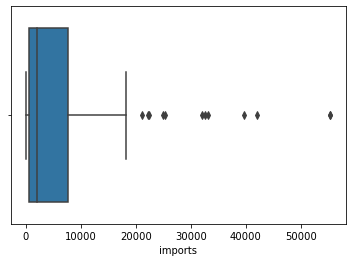

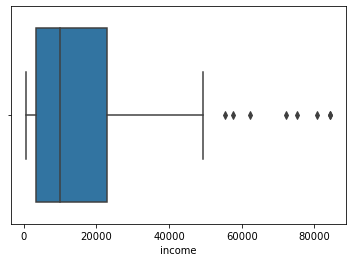

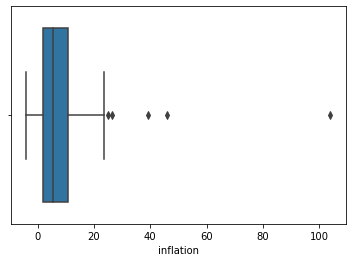

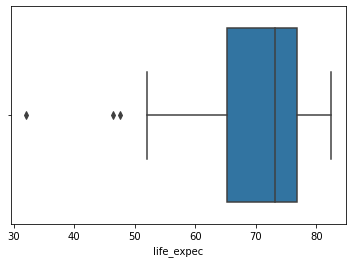

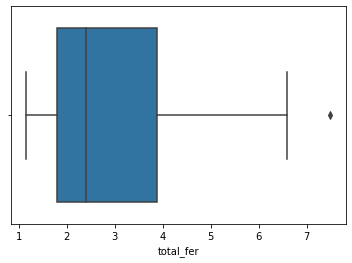

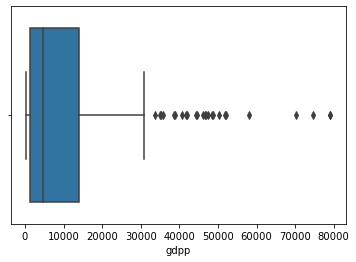

In [27]:
for c in num_columns:
    sns.boxplot(df[c])
    plt.show();

# Exploratory Data Analysis

## Visualising Distribution

Let's make a pairplot of all the numeric variables

In [28]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [29]:
num_columns = df.drop('country',axis=1)

In [30]:
num_columns

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0
163,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0
164,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0
165,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0


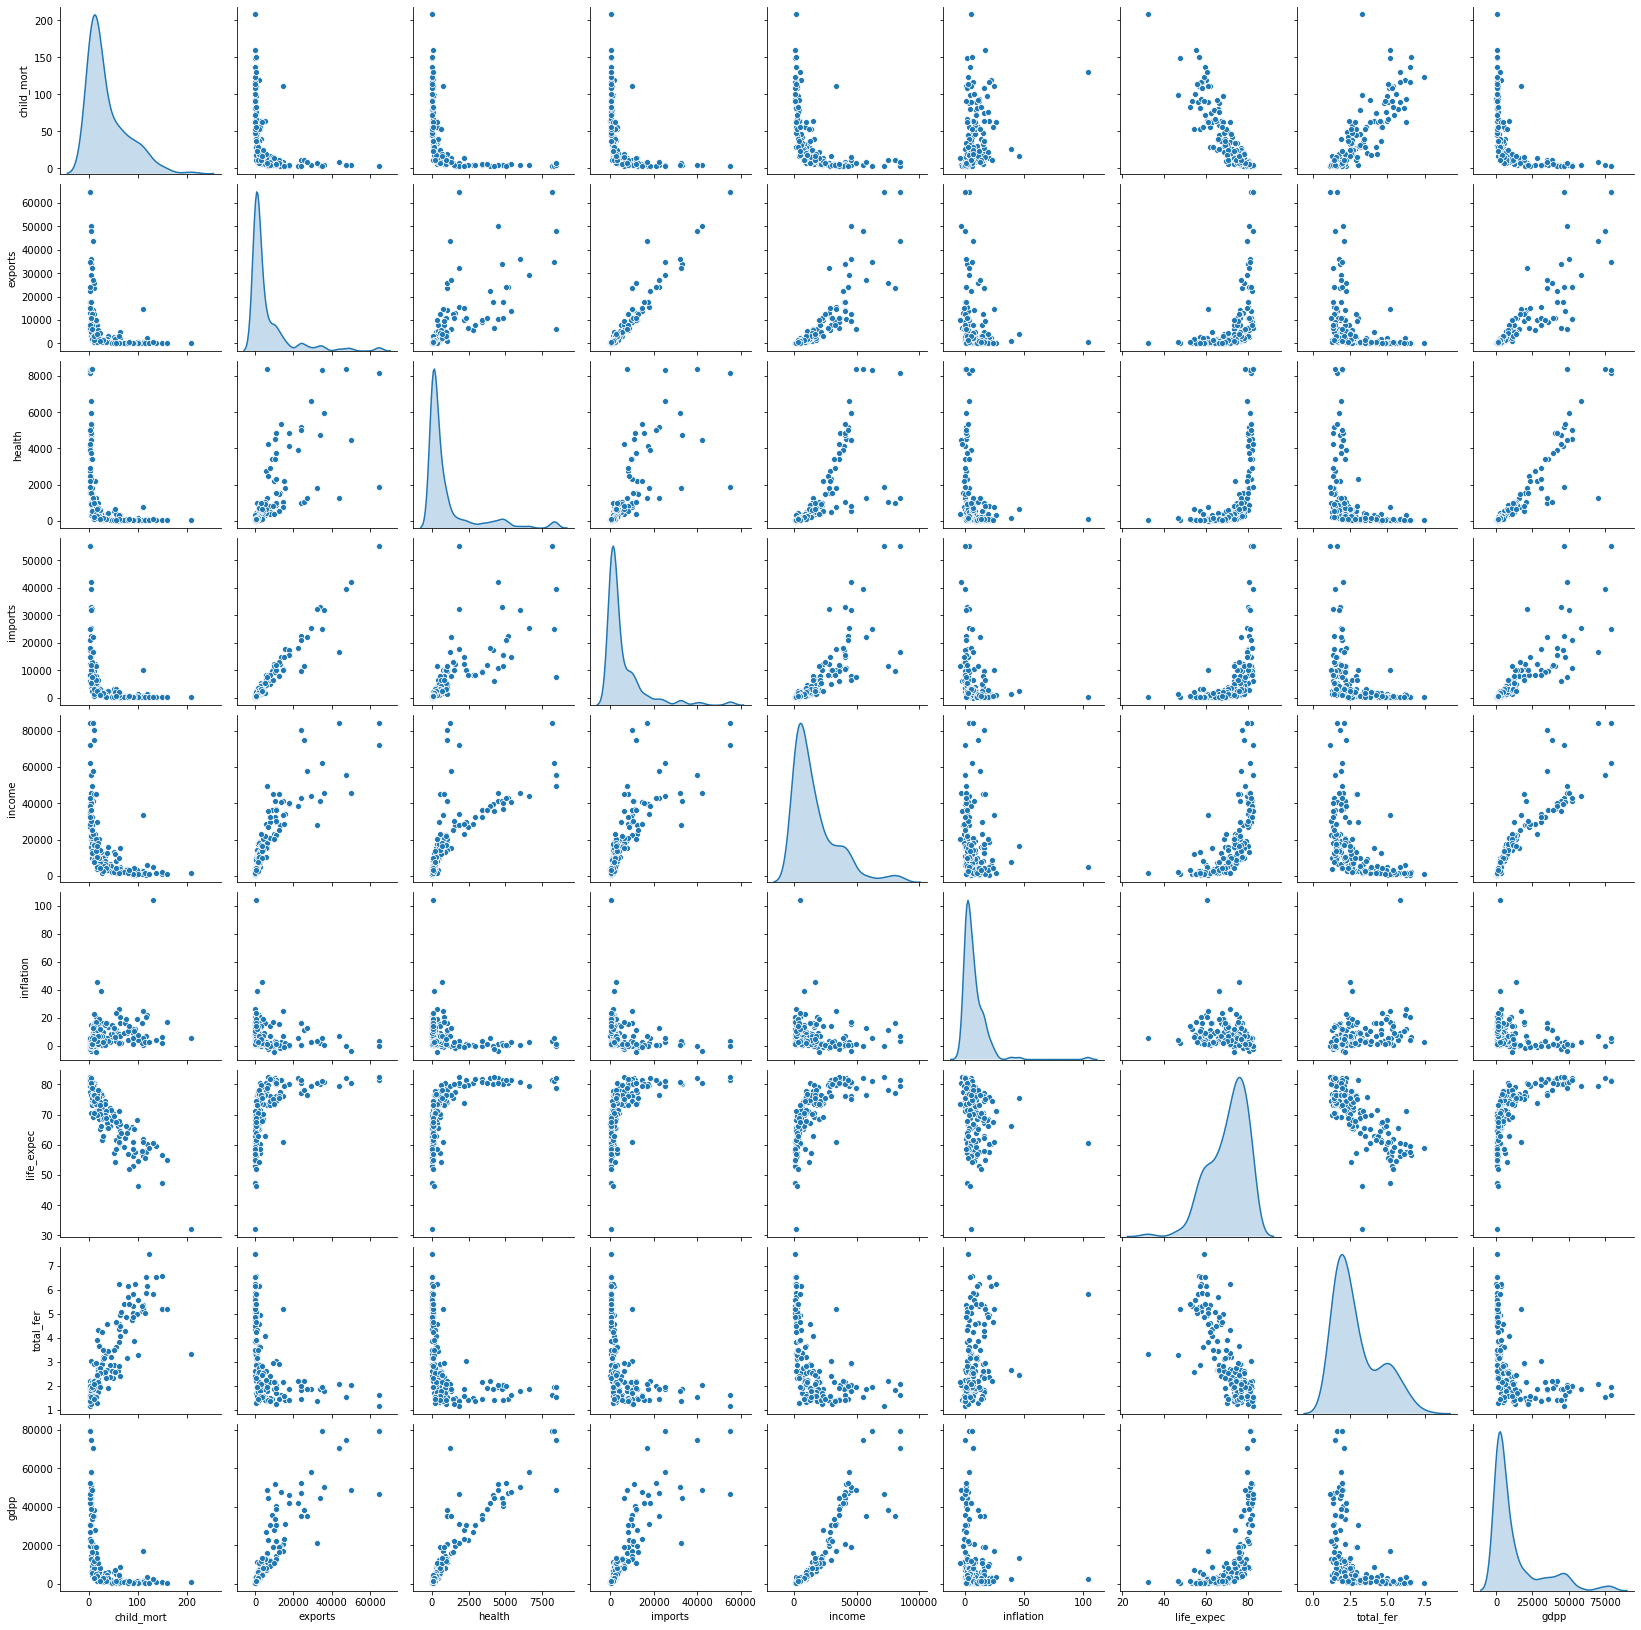

In [31]:
sns.pairplot(num_columns ,diag_kind='kde')
plt.show()

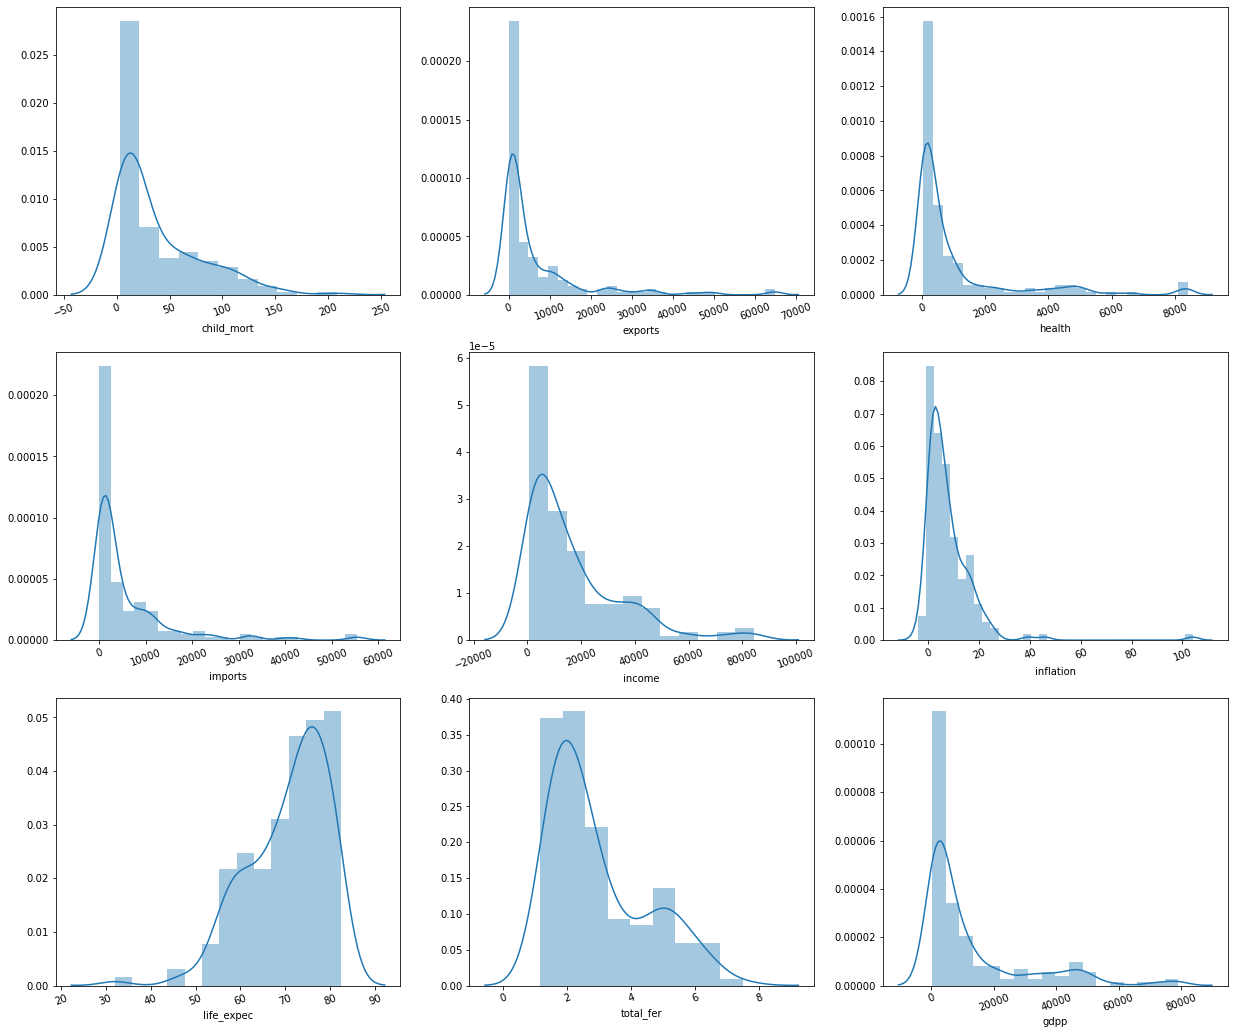

In [32]:
plt.figure(figsize=(21, 18))
for i in enumerate(num_columns):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=20)

Insight: - Most of the data point are 'NOT Normally' distributed. - Their variance are also differernt. - Their range are also differnt All the above points indicates the need of standardising the data before we build the model. Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

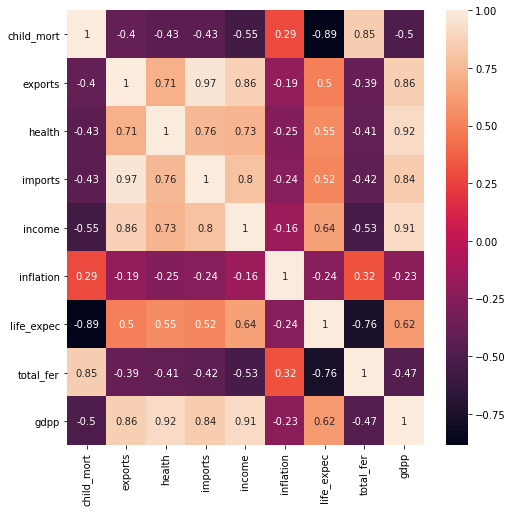

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True);

# Hopkin's Test

#### Check the Cluster Tendency

In [34]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
df_new = num_columns.copy()
hopkins(df_new)

0.9310390145263494

Hopkin's test says that our data is 95.5% different from the randomly scattered data.

The higher the value of dissimilarity, the more apt is our data for clustering.
A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data 
will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

# Scaling the data
We will use Standardisation method for scaling the data.

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [37]:
df_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.551138,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.886987,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.370000,7.490000,79088.000000


In [38]:
# rescaling

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_new)
df_scaled.shape

(167, 9)

In [39]:
df_scaled

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61970522,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34435902,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09372771,
         1.6246091 , -0.6500669 ]])

In [40]:
#Converting it into a dataframe

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.541946,-0.032042


# Modelling

#### Hierarchical Clustering¶
As mentioned in the 'Approach' section, we will use Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance)

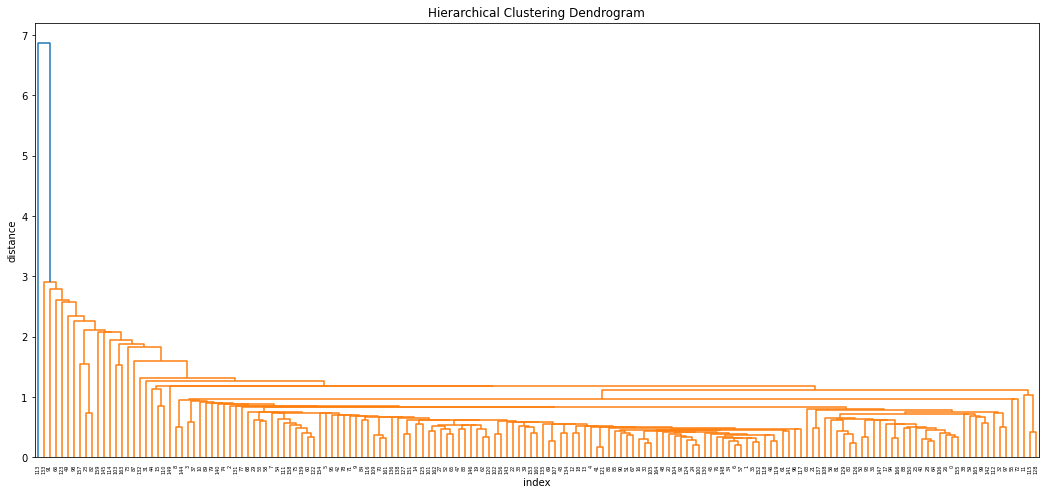

In [41]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
linkage_s = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(linkage_s)
plt.show()

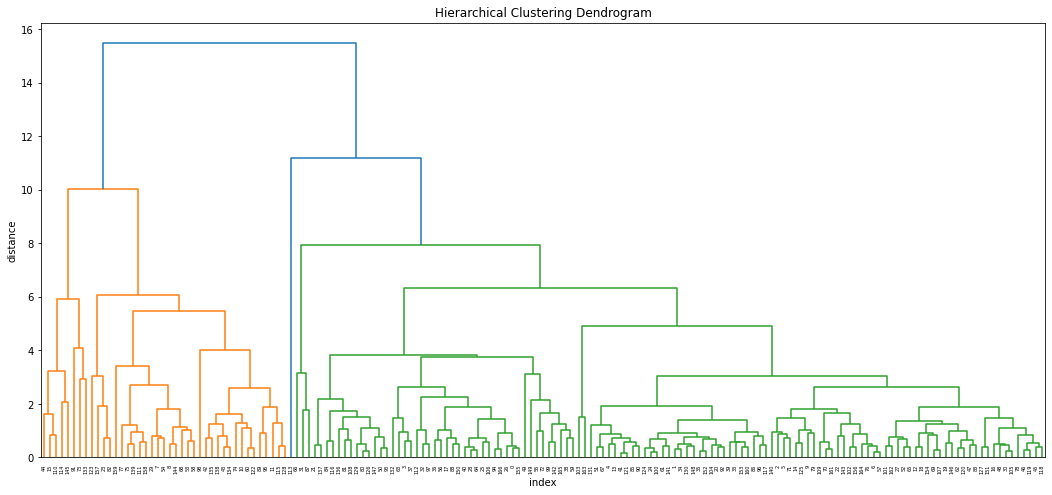

In [42]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
linkage_c = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(linkage_c)
plt.show()

NOTE: From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

### First Iteration - Using 3 Clusters

In [43]:
# 3 clusters
cluster_labels_3 = cut_tree(linkage_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [45]:
# Create a new datafame with cluster labels to it.
df_clustered = df.copy()
df_clustered['cluster_labels_3'] = cluster_labels_3

df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [46]:
df_clustered.shape

(167, 11)

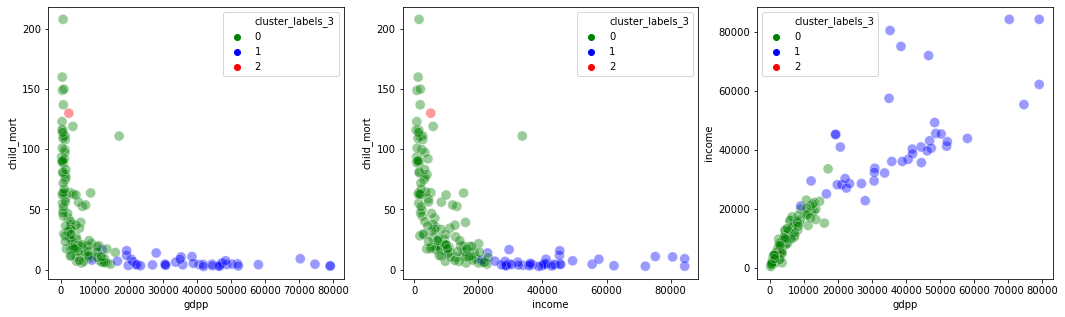

In [47]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=df_clustered, legend='full', palette=['green','blue','red'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=df_clustered, legend='full', palette=['green','blue','red'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=df_clustered, legend='full', palette=['green','blue','red'], s=100, c='lightblue', alpha=.4)
plt.show()

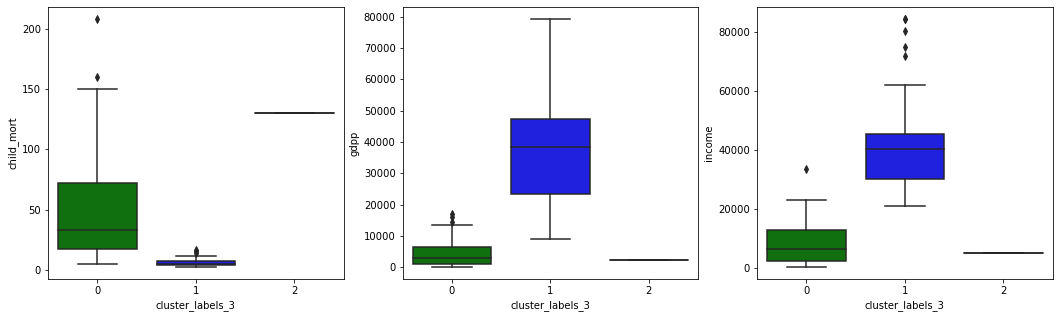

In [48]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=df_clustered, palette=['green','blue','red'])
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=df_clustered, palette=['green','blue','red'])
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=df_clustered, palette=['green','blue','red'])

plt.show()

In [49]:
# Checking cluster count
df_clustered.cluster_labels_3.value_counts()

0    125
1     41
2      1
Name: cluster_labels_3, dtype: int64

In [50]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.
df_clustered[df_clustered['cluster_labels_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.00,1.93,51900.0,1
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.50,1.44,46900.0,1
10,Bahamas,13.8,9800.00,2209.2000,12236.00,22900.0,-0.393,73.80,1.86,28000.0,1
11,Bahrain,8.6,14386.50,1028.7900,10536.30,41100.0,7.440,76.00,2.16,20700.0,1
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.00,1.86,44400.0,1
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.10,1.84,35300.0,1
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.30,1.63,47400.0,1
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.90,1.42,30800.0,1
43,Czech Republic,3.4,13068.00,1560.2400,12454.20,28300.0,-1.430,77.50,1.51,19800.0,1
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.50,1.87,58000.0,1


In [51]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.
df_clustered[df_clustered['cluster_labels_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,2


#### Cluster 1 & 2 seems to be Developed or Developing countries, so our segmentation is good in terms of all our under developed countries are segmented under cluster 0. We will further fine tune this cluster.

### Second Iteration - Using 4 Clusters

In [52]:
# 4 clusters
cluster_labels_4 = cut_tree(linkage_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
df_clustered['cluster_labels_4'] = cluster_labels_4
df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [54]:
df_clustered.shape

(167, 12)

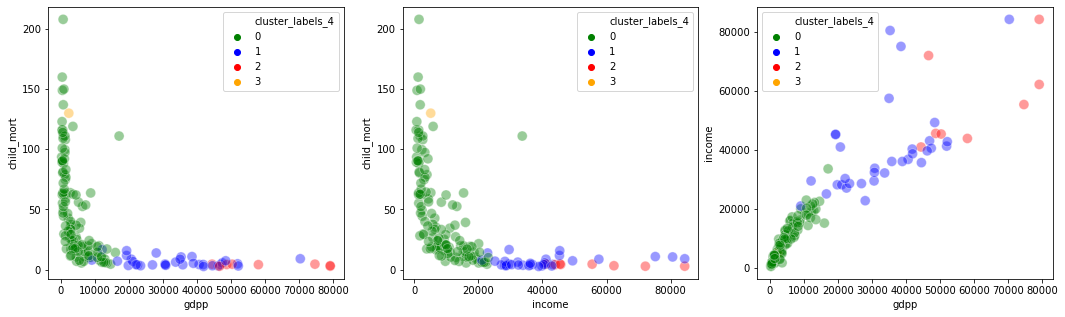

In [55]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=df_clustered, legend='full', palette=['green','blue','red','orange'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=df_clustered, legend='full', palette=['green','blue','red','orange'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=df_clustered, legend='full', palette=['green','blue','red','orange'], s=100, c='lightblue', alpha=.4)
plt.show()

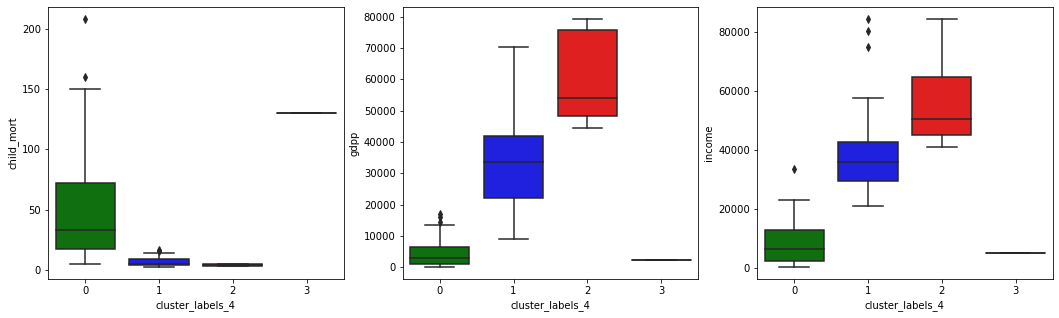

In [56]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=df_clustered, palette=['green','blue','red','orange'])
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=df_clustered, palette=['green','blue','red','orange'])
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=df_clustered, palette=['green','blue','red','orange'])

plt.show()

In [57]:
df_clustered.cluster_labels_4.value_counts()

0    125
1     33
2      8
3      1
Name: cluster_labels_4, dtype: int64

In [58]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.
df_clustered[df_clustered['cluster_labels_4'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
7,Australia,4.8,10276.20,4530.8700,10847.1,41400.0,1.160,82.00,1.93,51900.0,1,1
8,Austria,4.3,24059.70,5159.0000,22418.2,43200.0,0.873,80.50,1.44,46900.0,1,1
10,Bahamas,13.8,9800.00,2209.2000,12236.0,22900.0,-0.393,73.80,1.86,28000.0,1,1
11,Bahrain,8.6,14386.50,1028.7900,10536.3,41100.0,7.440,76.00,2.16,20700.0,1,1
23,Brunei,10.5,23792.20,1002.5200,9884.0,80600.0,16.700,77.10,1.84,35300.0,1,1
29,Canada,5.6,13793.40,5356.2000,14694.0,40700.0,2.870,81.30,1.63,47400.0,1,1
42,Cyprus,3.6,15461.60,1838.7600,17710.0,33900.0,2.010,79.90,1.42,30800.0,1,1
43,Czech Republic,3.4,13068.00,1560.2400,12454.2,28300.0,-1.430,77.50,1.51,19800.0,1,1
53,Finland,3.0,17879.40,4134.9000,17278.8,39800.0,0.351,80.00,1.87,46200.0,1,1
54,France,4.2,10880.80,4831.4000,11408.6,36900.0,1.050,81.40,2.03,40600.0,1,1


In [59]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.
df_clustered[df_clustered['cluster_labels_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.00,1.86,44400.0,1,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.50,1.87,58000.0,1,2
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.40,2.05,48700.0,1,2
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.30,1.63,79088.0,1,2
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.70,1.79,50300.0,1,2
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.00,1.95,79088.0,1,2
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.37,1.15,46600.0,1,2
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.20,1.52,74600.0,1,2


In [60]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.
df_clustered[df_clustered['cluster_labels_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,2,3


#### INSIGHT: From the above 2 iterations of Hierarchical Clustering, it is evident that 3 CLUSTERS is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment. Since Nigera could be a possible candidate for financial aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3. We will further validate with other methods below.

### Analysing the Hierarchical Model

,gdpp,income
cluster_labels_3,,
0,4360.912000,8396.104000
1,38608.439024,42940.195122
2,2330.000000,5150.000000


<Figure size 576x360 with 0 Axes>

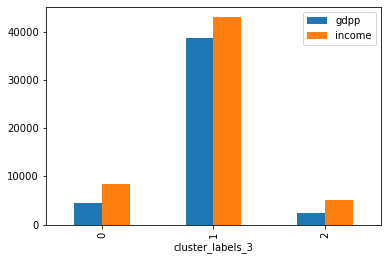

In [61]:
plt.figure(figsize=(8, 5))
df_heir_gdp_inc =df_clustered[['cluster_labels_3','gdpp','income']]
df_heir_gdp_inc = df_heir_gdp_inc.groupby('cluster_labels_3').mean()
display(df_heir_gdp_inc)
df_heir_gdp_inc.plot.bar()
plt.show()

,child_mort
cluster_labels_3,
0,48.123200
1,5.992683
2,130.000000


<Figure size 576x360 with 0 Axes>

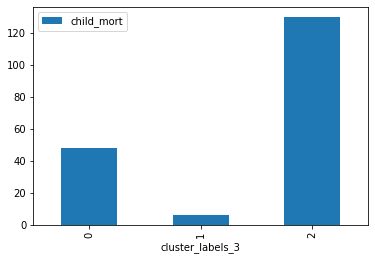

In [62]:
plt.figure(figsize=(8, 5))
df_heir_mort =df_clustered[['cluster_labels_3','child_mort']]
df_heir_mort = df_heir_mort.groupby('cluster_labels_3').mean()
display(df_heir_mort)
df_heir_mort.plot.bar()
plt.show()

#### Interpretation of Clusters: Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 0 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be. ---

# Find the Optimal K for K-Mean Clustering

#### SSD Elbow Curve

In [63]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.541946,-0.032042


In [64]:
df_scaled.shape

(167, 9)

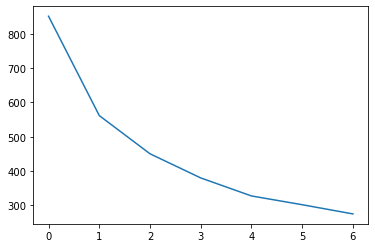

In [65]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Silhoutte Analysis

In [66]:
# silhouette analysis
range_of_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_of_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47852228202059055
For n_clusters=3, the silhouette score is 0.42251998843901384
For n_clusters=4, the silhouette score is 0.4086406247102439
For n_clusters=5, the silhouette score is 0.4147083513135412
For n_clusters=6, the silhouette score is 0.3014837821061631
For n_clusters=7, the silhouette score is 0.30425709889485325
For n_clusters=8, the silhouette score is 0.3063336004886664


#### INSIGHT: From the above validations(Elbow Curve & silhouette analysis), we could see that 3,4 or 5 clusters are optimal number of clusters to be used. We will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results.

# K-Means Clustering

#### First Iteration Using 3 Clusters

In [67]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(df_scaled)
kmeans_3.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [68]:
df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [69]:
df_clustered.shape

(167, 12)

In [70]:
# assign the label
df_kmean = df_clustered.copy()
df_kmean['cluster_id_3'] = kmeans_3.labels_
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0


In [71]:
#Checking the number of countries in each cluster
df_kmean.cluster_id_3.value_counts()

0    92
1    48
2    27
Name: cluster_id_3, dtype: int64

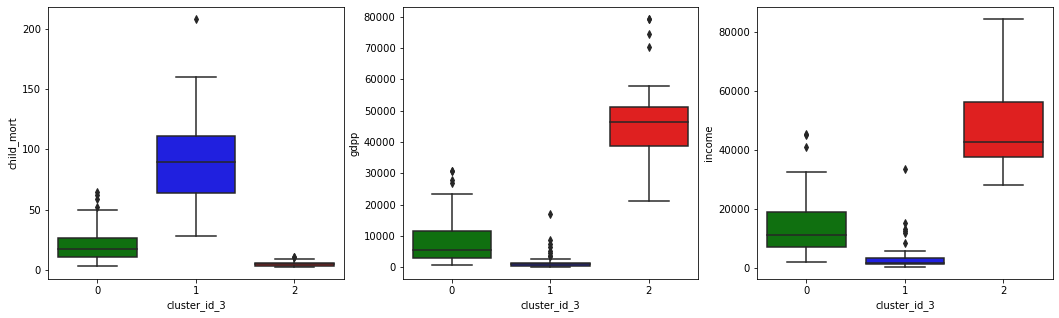

In [72]:
# Box plot on various variable against the CLUSTER_ID_3 to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort', data=df_kmean, palette=['green','blue','red'])
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp', data=df_kmean, palette=['green','blue','red'])
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income', data=df_kmean, palette=['green','blue','red'])

plt.show()

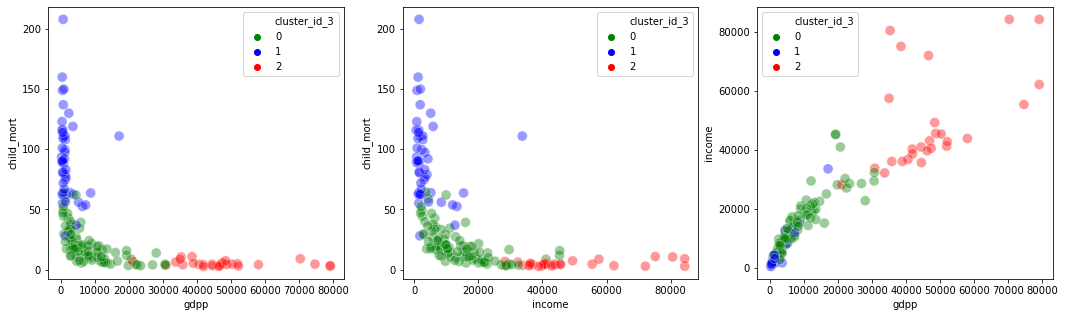

In [73]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=df_kmean, legend='full', palette=['green','blue','red'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=df_kmean, legend='full', palette=['green','blue','red'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=df_kmean, legend='full', palette=['green','blue','red'], s=100, c='lightblue', alpha=.4)
plt.show()

In [74]:
# Checking the CLuster means:
df_kmean.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
cluster_id_3,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565,0.152174,0.152174
2,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.434815,1.775185,47476.888889,1.000000,1.296296


#### INSIGHT: Cluster 2 & Cluster 0 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [75]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_kmean[['country','child_mort','income','gdpp']][df_kmean['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
82,Kuwait,10.8,75200.0,38500.0
23,Brunei,10.5,80600.0,35300.0
123,Qatar,9.0,84374.0,70300.0
157,United Arab Emirates,8.6,57600.0,35000.0
159,United States,7.3,49400.0,48400.0
98,Malta,6.8,28300.0,21100.0
111,New Zealand,6.2,32300.0,33700.0
29,Canada,5.6,40700.0,47400.0
158,United Kingdom,5.2,36200.0,38900.0
7,Australia,4.8,41400.0,51900.0


In [76]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

df_kmean[['country','child_mort','income','gdpp']][df_kmean['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720.0,988.0
154,Turkmenistan,62.0,9940.0,4440.0
69,India,58.8,4410.0,1350.0
146,Tajikistan,52.4,2110.0,738.0
12,Bangladesh,49.4,2440.0,758.0
...,...,...,...,...
122,Portugal,3.9,27200.0,22500.0
60,Greece,3.9,28700.0,26900.0
139,Spain,3.8,32500.0,30700.0
43,Czech Republic,3.4,28300.0,19800.0


# Second Iteration - Using 4 Clusters

In [77]:
# K Means with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(df_scaled)
kmeans_4.labels_

array([1, 3, 3, 1, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1,
       3, 0, 3, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 3, 0, 3, 3, 3, 1, 2, 0, 0, 3, 0, 3, 3, 1, 1, 0, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       2, 0, 1, 1, 2, 0, 1, 3, 3, 3, 3, 3, 0, 2, 3, 3, 1, 3, 0, 1, 3, 3,
       1, 2, 0, 0, 1, 1, 0, 0, 3, 3, 1, 3, 0, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1], dtype=int32)

In [78]:
# assign the label
df_kmean['cluster_id_4'] = kmeans_4.labels_
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0,3
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0,3
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0,3


In [79]:
# Checking the number of countries in each cluster

df_kmean.cluster_id_4.value_counts()

3    80
1    48
0    30
2     9
Name: cluster_id_4, dtype: int64

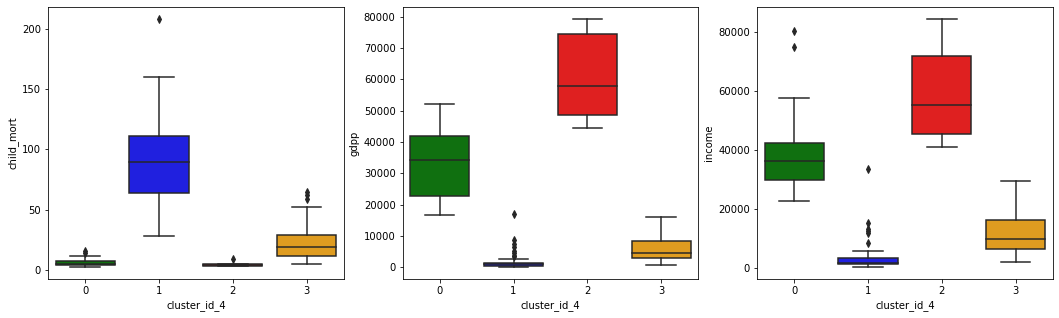

In [80]:
# Box plot on various variable against the CLUSTER_ID_3 to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort', data=df_kmean, palette=['green','blue','red','orange'])
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp', data=df_kmean, palette=['green','blue','red','orange'])
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income', data=df_kmean, palette=['green','blue','red','orange'])

plt.show()

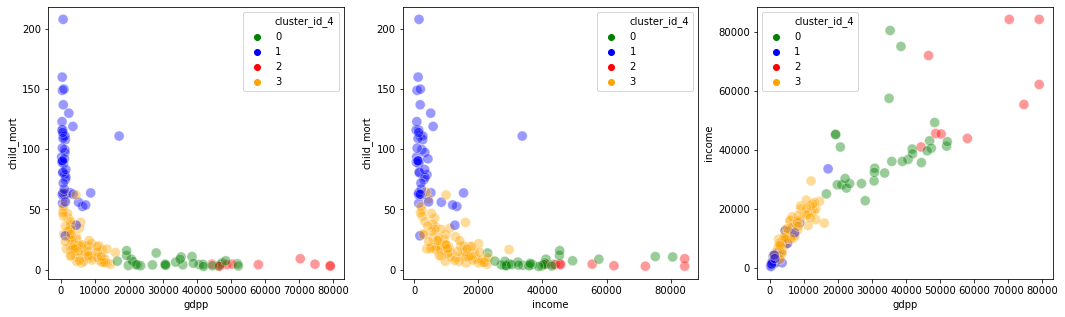

In [81]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=df_kmean, legend='full', palette=['green','blue','red','orange'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=df_kmean, legend='full', palette=['green','blue','red','orange'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=df_kmean, legend='full', palette=['green','blue','red','orange'], s=100, c='lightblue', alpha=.4)
plt.show()

In [82]:
# Checking the CLuster means:
df_kmean.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
cluster_id_4,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,1.0
3,22.157500,2580.729982,385.856630,2793.990264,11478.625000,7.490737,72.871250,2.273375,5962.150000,0.025000,0.025000,0.0
0,6.053333,14588.460000,2994.614680,13092.230000,39163.333333,3.634100,79.395667,1.831000,33690.000000,1.000000,1.000000,1.2
2,4.400000,45063.846667,5537.121156,36092.231111,59438.666667,2.172111,80.774444,1.765556,61230.666667,1.000000,1.888889,2.0


#### INSIGHT: Cluster 3 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [83]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

df_kmean[['country','child_mort','income','gdpp']][df_kmean['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720.0,988.0
154,Turkmenistan,62.0,9940.0,4440.0
69,India,58.8,4410.0,1350.0
146,Tajikistan,52.4,2110.0,738.0
12,Bangladesh,49.4,2440.0,758.0
...,...,...,...,...
121,Poland,6.0,21800.0,12600.0
67,Hungary,6.0,22300.0,13100.0
14,Belarus,5.5,16200.0,6030.0
41,Croatia,5.5,20100.0,13500.0


In [84]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

df_kmean[['country','child_mort','income','gdpp']][df_kmean['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
113,Nigeria,130.0,5150.0,2330.0
112,Niger,123.0,814.0,348.0
3,Angola,119.0,5900.0,3530.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
25,Burkina Faso,116.0,1430.0,575.0


# Second Iteration - Using 5 Clusters

In [85]:
# K Means with k=5
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_5.fit(df_scaled)
kmeans_5.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 2, 3, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 3, 0, 4, 2, 3, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 0, 3, 3, 1, 1, 0, 1, 3, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [86]:
# assign the label
df_kmean['cluster_id_5'] = kmeans_5.labels_
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4,cluster_id_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,1,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0,3,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0,3,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,1,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0,3,1


In [87]:
#Checking the number of countries in each cluster
df_kmean.cluster_id_5.value_counts()

1    81
0    47
3    29
2     9
4     1
Name: cluster_id_5, dtype: int64

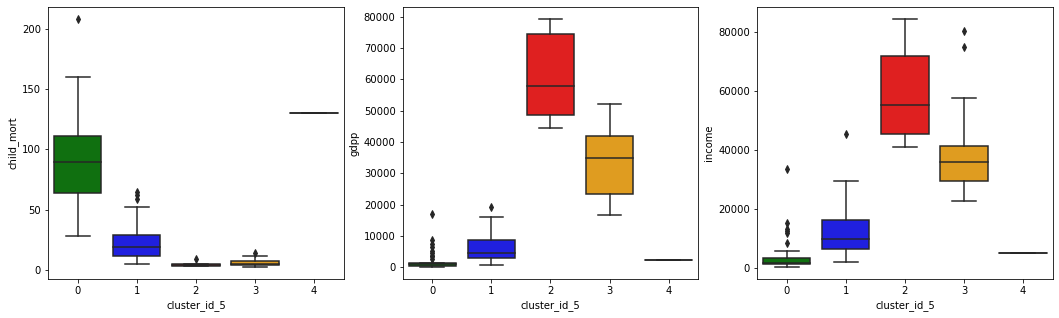

In [88]:
# Box plot on various variable against the CLUSTER_ID_5 to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_5', y='child_mort', data=df_kmean, palette=['green','blue','red','orange','purple'])
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_5', y='gdpp', data=df_kmean, palette=['green','blue','red','orange','purple'])
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_5', y='income', data=df_kmean, palette=['green','blue','red','orange','purple'])

plt.show()

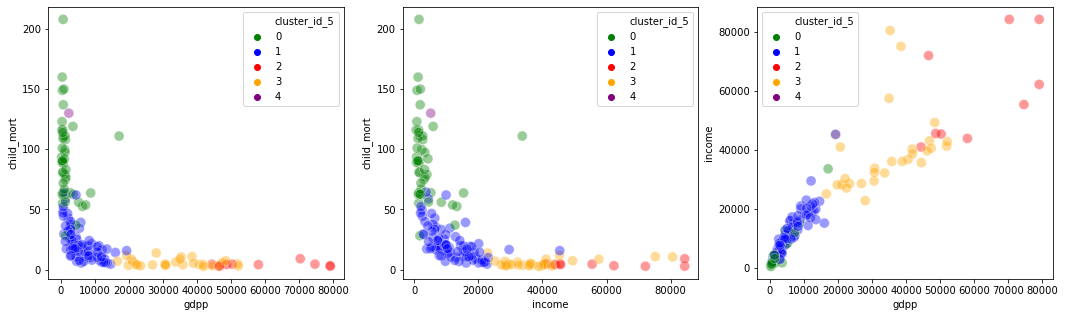

In [89]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_5',
                data=df_kmean, legend='full', palette=['green','blue','red','orange','purple'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_5',
                data=df_kmean, legend='full', palette=['green','blue','red','orange','purple'], s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_5',
                data=df_kmean, legend='full', palette=['green','blue','red','orange','purple'], s=100, c='lightblue', alpha=.4)
plt.show()

In [90]:
# Checking the CLuster means:
df_kmean.groupby(['cluster_id_5']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
cluster_id_5,,,,,,,,,,,,,
4,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,2.000000,3.000000,1.000000,1.000000
0,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,0.000000,0.000000,1.000000,1.000000
1,22.077778,2667.051834,391.314820,2838.126186,11897.407407,7.610605,72.898765,2.281852,6126.814815,0.037037,0.037037,0.000000,2.962963
3,5.720690,14761.413793,3069.326566,13324.065517,38948.275862,3.166310,79.543793,1.792069,34186.206897,1.000000,1.000000,1.241379,0.000000
2,4.400000,45063.846667,5537.121156,36092.231111,59438.666667,2.172111,80.774444,1.765556,61230.666667,1.000000,1.888889,2.000000,2.000000


#### INSIGHT: Cluster 4 & Cluster 0 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [91]:
# Checking the countries in Cluster 4 to see which are the countries in that segment.

df_kmean[['country','child_mort','income','gdpp']][df_kmean['cluster_id_5'] == 4].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
113,Nigeria,130.0,5150.0,2330.0


In [92]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

df_kmean[['country','child_mort','income','gdpp']][df_kmean['cluster_id_5'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
112,Niger,123.0,814.0,348.0
3,Angola,119.0,5900.0,3530.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
25,Burkina Faso,116.0,1430.0,575.0
64,Guinea-Bissau,114.0,1390.0,547.0


# Choosing the model

#### From the above 3 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL

In [93]:
df_kmean_analysis = df_kmean.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
df_kmean_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4,cluster_id_5
cluster_id_3,,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,1.000000,0.083333
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565,0.152174,0.152174,2.608696,1.239130
2,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.434815,1.775185,47476.888889,1.000000,1.296296,0.666667,2.666667


In [94]:
# Creating a new field for count of observations in each cluster

df_kmean_analysis['observations']=df_kmean[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
df_kmean_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4,cluster_id_5,observations
cluster_id_3,,,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,1.000000,0.083333,48
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565,0.152174,0.152174,2.608696,1.239130,92
2,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.434815,1.775185,47476.888889,1.000000,1.296296,0.666667,2.666667,27


In [95]:
# Creating a new field for proportion of observations in each cluster
df_kmean_analysis['Proportion']=round(df_kmean_analysis['observations']/df_kmean_analysis['observations'].sum(),2)


#Summary View
df_kmean_analysis[['child_mort','income','gdpp','observations','Proportion']]

,child_mort,income,gdpp,observations,Proportion
cluster_id_3,,,,,
1,91.610417,3897.354167,1909.208333,48,0.29
0,20.177174,14169.456522,8226.869565,92,0.55
2,5.092593,49057.333333,47476.888889,27,0.16


,gdpp,income
cluster_id_3,,
0,8226.869565,14169.456522
1,1909.208333,3897.354167
2,47476.888889,49057.333333


<Figure size 576x360 with 0 Axes>

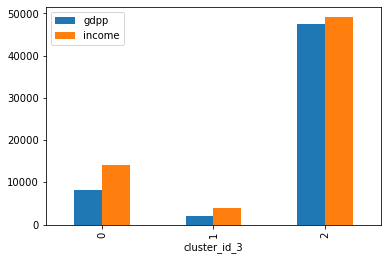

In [96]:
plt.figure(figsize=(8, 5))
df_kmean_gdp_inc =df_kmean[['cluster_id_3','gdpp','income']]
df_kmean_gdp_inc = df_kmean_gdp_inc.groupby('cluster_id_3').mean()
display(df_kmean_gdp_inc)
df_kmean_gdp_inc.plot.bar()
plt.show()

,child_mort
cluster_id_3,
0,20.177174
1,91.610417
2,5.092593


<Figure size 576x360 with 0 Axes>

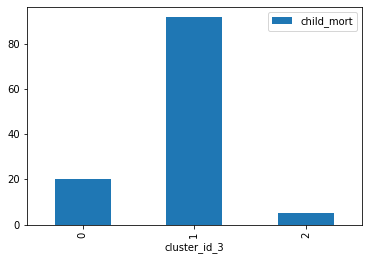

In [97]:
plt.figure(figsize=(8, 5))
df_kmean_child_mort =df_kmean[['cluster_id_3','child_mort']]
df_kmean_child_mort = df_kmean_child_mort.groupby('cluster_id_3').mean()
display(df_kmean_child_mort)
df_kmean_child_mort.plot.bar()
plt.show()

#### Interpretation of Clusters: Cluster 2 has the Highest average Child Mortality rate of ~92 when compared to other 2 clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations ---

## Renaming the Clusters to a Meaningful Name

In [98]:
df_kmean_analysis = df_kmean_analysis.rename({
    2: 'Under_Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [99]:
df_kmean_analysis

,cluster_id_3,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4,cluster_id_5,observations,Proportion
0,Developed Countries,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.041667,0.062500,1.000000,0.083333,48,0.29
1,Developing Countries,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565,0.152174,0.152174,2.608696,1.239130,92,0.55
2,Under_Developed Countries,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.434815,1.775185,47476.888889,1.000000,1.296296,0.666667,2.666667,27,0.16


#### Final Cluster: Based on the above interpretation of the cluster, we now rename all the clusters accordingly. The Cluster 2 now becomes 'Under Developed Countries', which will be of our interest. --- We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

In [100]:
df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels_3',
       'cluster_labels_4', 'cluster_id_3', 'cluster_id_4', 'cluster_id_5'],
      dtype='object')

In [101]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = df_kmean[df_kmean['cluster_id_3'] == 2].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]

In [102]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

,country,child_mort,income,gdpp
98,Malta,6.8,28300.0,21100.0
42,Cyprus,3.6,33900.0,30800.0
111,New Zealand,6.2,32300.0,33700.0
157,United Arab Emirates,8.6,57600.0,35000.0
23,Brunei,10.5,80600.0,35300.0
75,Italy,4.0,36200.0,35800.0
82,Kuwait,10.8,75200.0,38500.0
158,United Kingdom,5.2,36200.0,38900.0
54,France,4.2,36900.0,40600.0
58,Germany,4.2,40400.0,41800.0


In [103]:
final_cluster.describe()

,child_mort,income,gdpp
count,27.000000,27.000000,27.000000
mean,5.092593,49057.333333,47476.888889
std,2.319470,16604.947131,14286.719313
min,2.600000,28300.000000,21100.000000
25%,3.400000,37850.000000,38700.000000
50%,4.300000,42900.000000,46200.000000
75%,5.900000,56550.000000,51100.000000
max,10.800000,84374.000000,79088.000000


# FINAL DECISION ON THE APPROCH

#### NOTE: Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.

## Fetching the final data based on Cluster Median
### Data less than median of gdpp of the cluster

#### NOTE: We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932.

In [104]:
Under_Developed_Countries = df[df['gdpp'] <= 932].copy()
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 932]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [105]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
88,Liberia,89.3,327.0,700.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
93,Madagascar,62.2,413.0,1390.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
50,Eritrea,55.2,482.0,1420.0


In [106]:
Under_Developed_Countries.shape

(29, 10)

#### Data less than median of income of the cluster

#### NOTE: We could see that the Median values of income for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with income <= 1860.

In [107]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [108]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
88,Liberia,89.3,327.0,700.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
93,Madagascar,62.2,413.0,1390.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
50,Eritrea,55.2,482.0,1420.0


In [109]:
Under_Developed_Countries.shape

(21, 10)

## Data greater than median of child mortality rate of the final cluster

#### NOTE: We could see that the Median values of Child Mortality for 'Under Developed Countries' is ~90. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 90.

In [110]:
# We create a new dataframe to store the countries satisfying the cluster median from original dataframe

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [111]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
150,Togo,90.3,488.0,1210.0
64,Guinea-Bissau,114.0,547.0,1390.0
0,Afghanistan,90.2,553.0,1610.0


In [112]:
Under_Developed_Countries.shape

(14, 10)

In [113]:
# Save the top 10 underdeveloped list to a new df

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

In [114]:
UDC_top_10

,country,gdpp,income,child_mort
26,Burundi,231.0,764.0,93.6
37,"Congo, Dem. Rep.",334.0,609.0,116.0
112,Niger,348.0,814.0,123.0
132,Sierra Leone,399.0,1220.0,160.0
106,Mozambique,419.0,918.0,101.0
31,Central African Republic,446.0,888.0,149.0
94,Malawi,459.0,1030.0,90.5
150,Togo,488.0,1210.0,90.3
64,Guinea-Bissau,547.0,1390.0,114.0
0,Afghanistan,553.0,1610.0,90.2


In [115]:
UDC_top_10.describe()

,gdpp,income,child_mort
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


## Univariate Analysis of Cluster 'Under_Developed_Countries' (recommended 10)

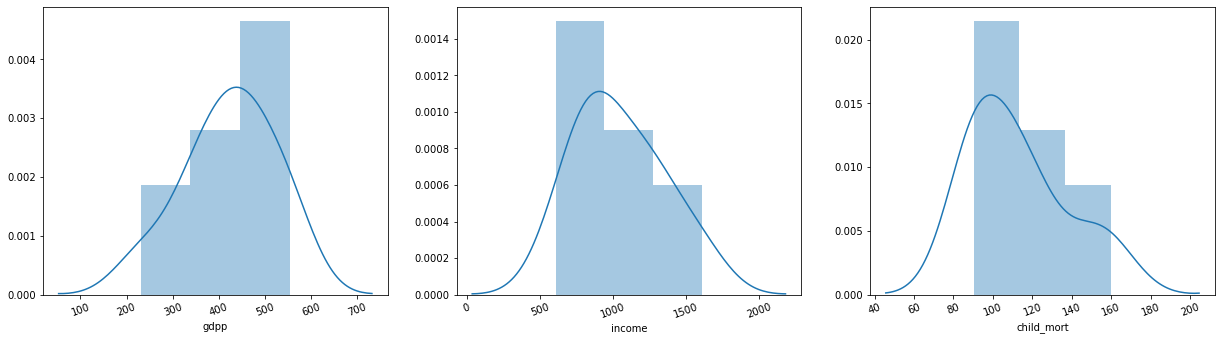

In [116]:
plt.figure(figsize=(21, 18))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)

## Bivariate Analysis of Cluster 'Under_Developed_Countries' (recommended 10)

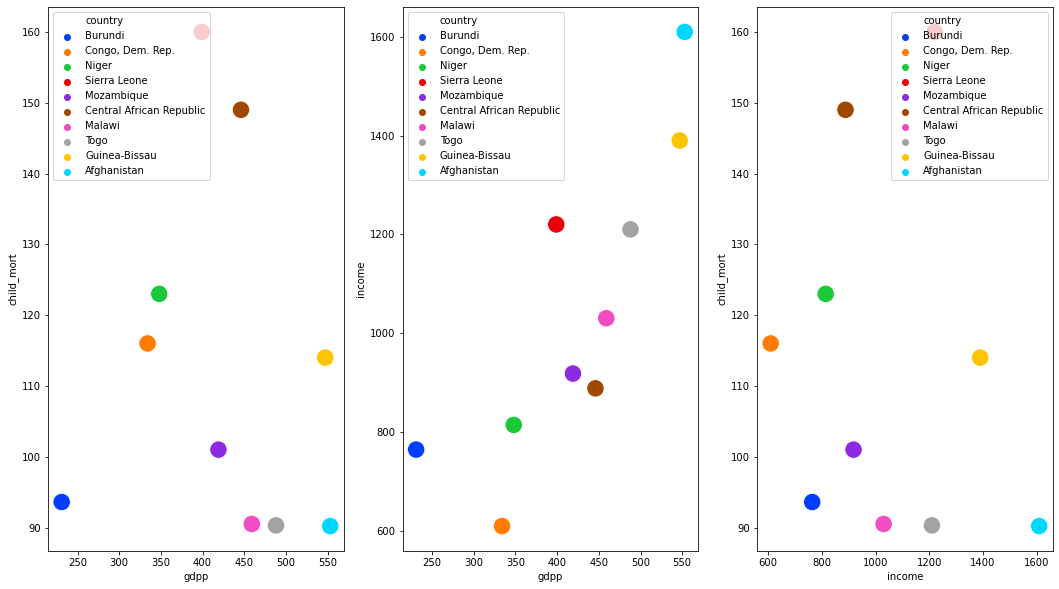

In [117]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

# Conclusion

#### We performed CLUSTERING on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO. Based on our Clustering Analysis, we have below the top countries under our 'Under Developed Countries' cluster which are in dire need of the Financial Aid. This output is purely based on the dataset we used and various analytical methodology we performed.

In [118]:
country_list = list(UDC_top_10.country)

In [119]:
print(country_list)

['Burundi', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Mozambique', 'Central African Republic', 'Malawi', 'Togo', 'Guinea-Bissau', 'Afghanistan']


<Figure size 360x360 with 0 Axes>

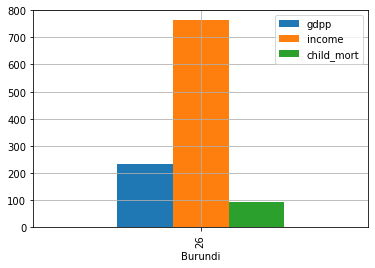

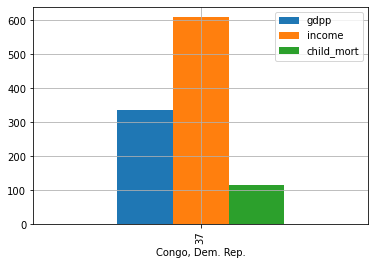

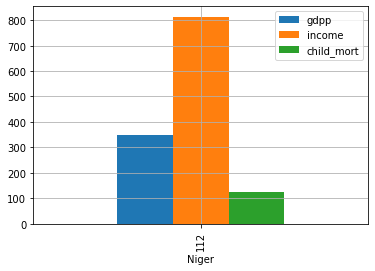

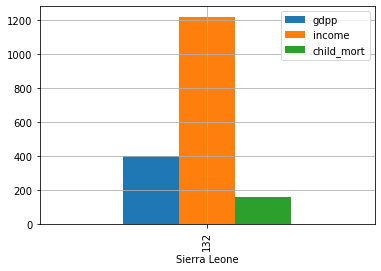

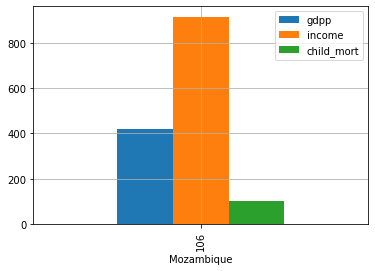

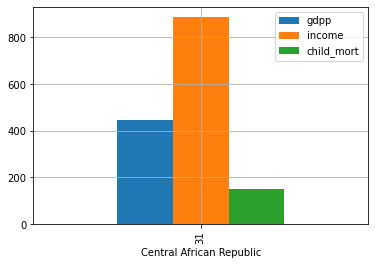

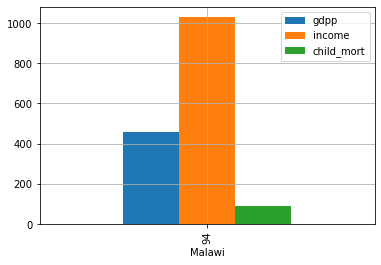

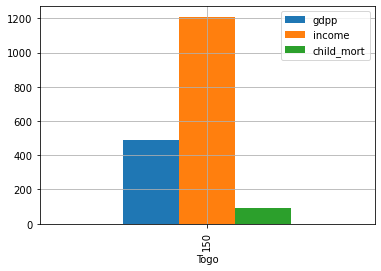

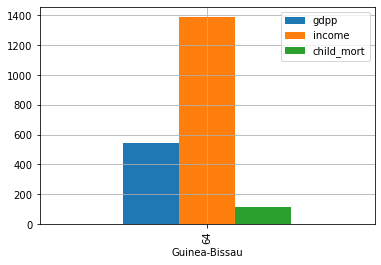

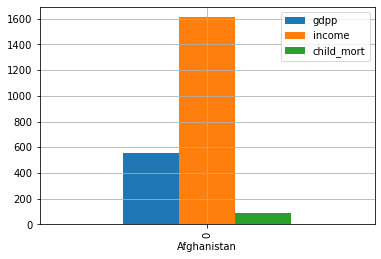

In [120]:
plt.figure(figsize=(5,5))
for i in enumerate(country_list):
    UDC_top_10[UDC_top_10['country']==i[1]].plot(kind='bar', grid=True)
    plt.xlabel(i[1])
plt.show()